<a href="https://colab.research.google.com/github/ericvillaceconomist/APIFMI/blob/main/API_International_Monetary_Fund_(IMF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse projeto tem como objetivo a consulta de dados econômicos do International Monetary Fund (IMF).


Autor: Eric Villac, FMVA®

 *Nesse projeto, presto as devidas referências a Brian Dew (BD Econ).




In [1]:
import pandas as pd
import requests
import plotly.express as px
import plotly.graph_objects as go


Exemplo API IMF

Modelo Padrão
Declaração de Variáveis

 IFS case: {Method}/{Series}/{Frequency}.{Area}.{Indicator}.{Date Range}

Para encontrar o nome da série e os seus dados, ir no seguinte link na seção "Data by Country":

https://data.imf.org/?sk=4C514D48-B6BA-49ED-8AB9-52B0C1A0179B&sId=1409151240976

Exemplo passo-a-passo:

1. Abra o link acima;

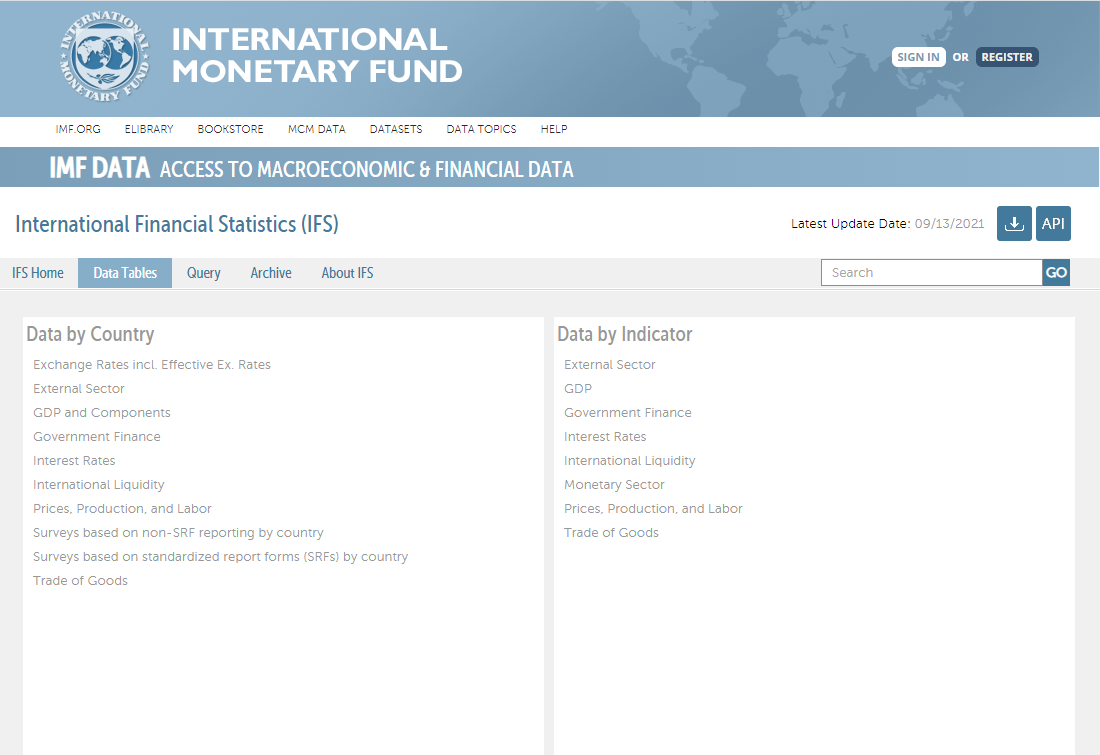
2. Escolha qual categoria de dado deseja visualizar;
3. Clicar e abrir a página no selecionado;
4. Neste exemplo será utilizada a categoria de "Interest Rates"
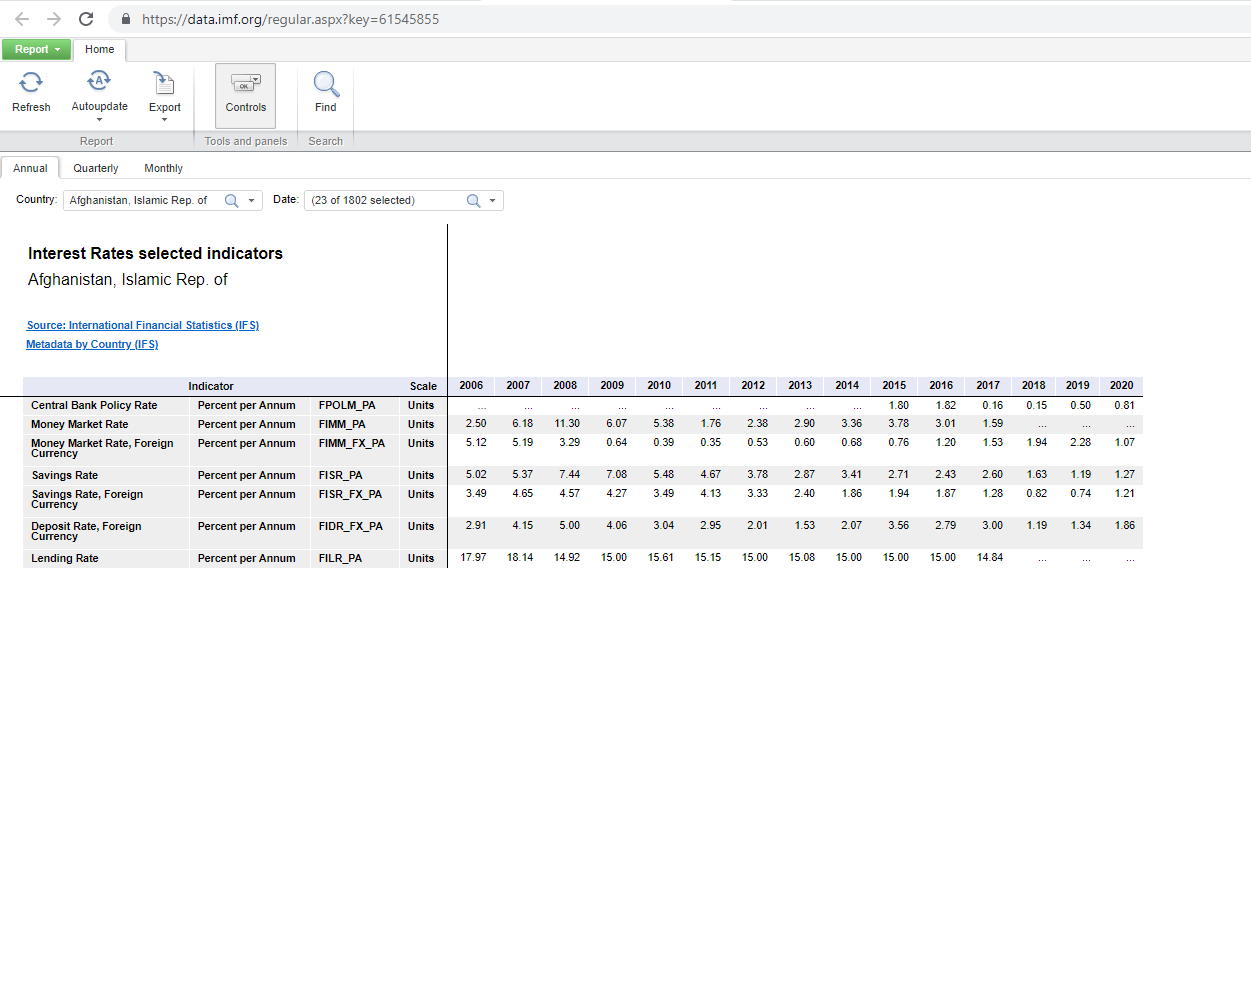



5. Escolha da série. Neste caso, é apresentado a taxa de empréstimo ("Lending Rate")

6. Inputar o ano (frequência da série), nome do país (forma abreviada), e o código da série

Para a frequência é necessário confirmar se a série comporta os diferentes periódos (em vermelho);
Para o país, é necessário confirmar se a série desejada está referenciada com o país de interesse (em verde);
Para a série (código), será inputado as letras (em preto na direita);
Para o nome, é copiado o que consta, na íntegra (em preto na esquerda).

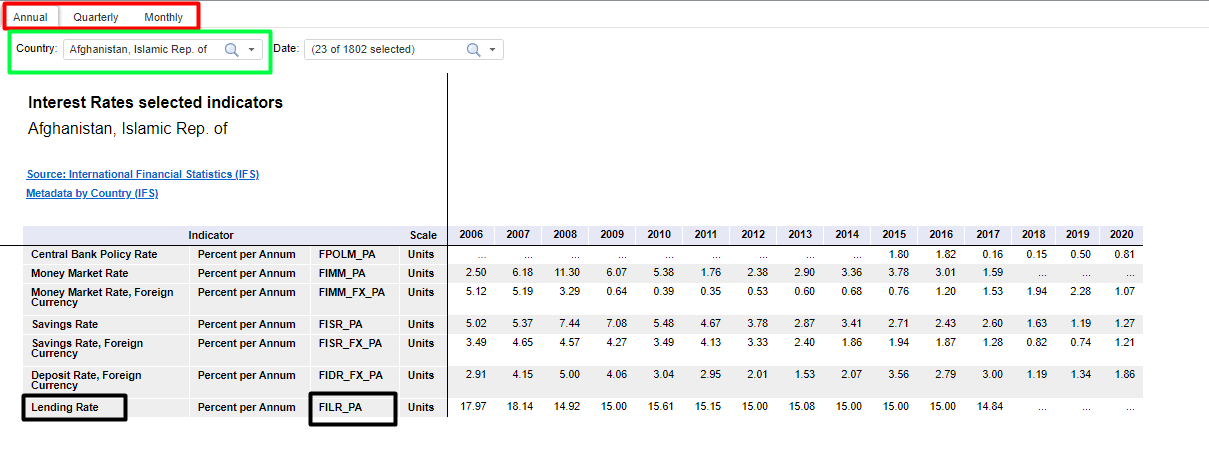

# Exemplo:
consulta_imf2('A','BR','FILR_PA','Lending Rate')


# **Método para automatizar a consulta**

In [2]:
def consulta_imf(freq,pais,Serie,nome):
#Identifica o país e a série
  url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
  key = 'GenericMetadata/IFS/{}.{}.{}'.format(freq,pais,Serie)
  metadata = requests.get(f'{url}{key}').json()
  country = metadata['GenericMetadata']['MetadataSet']\
              ['AttributeValueSet'][1]['ReportedAttribute']\
              [1]['ReportedAttribute'][3]['Value']['#text']
  indicator = metadata['GenericMetadata']['MetadataSet']\
              ['AttributeValueSet'][2]['ReportedAttribute']\
              [1]['ReportedAttribute'][4]['Value']['#text']
  print(f'Country: {country}; Indicator: {indicator}')

#Identifica a última observação
  url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
  key = 'CompactData/IFS/{}.{}.{}'.format(freq,pais,Serie) # adjust codes here

  # Lerá o json. Percorre as três strings, que ao final irão apresentar os valores que queremos trabalhar
  data = (requests.get(f'{url}{key}').json()
          ['CompactData']['DataSet']['Series'])

  print(data['Obs'][-1]) # Print latest observation


  data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

  df = pd.DataFrame(data_list, columns=['date', 'value'])
      
  df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

  # Save cleaned dataframe as a csv file
  df.to_csv('{}.csv'.format(nome), header=True)


  # Title and text with recent value
  title = f'{nome}'
  recentdt = df.index[-1].strftime('%B %Y')
  recentval = round(df[-1], 1)
  recent = f'Most recent: {recentdt}: {recentval}'
  source = 'Source: IMF IFS'

  # Basic plot
  plot = df.plot(title=title, colormap='Set1', figsize = (10,5))
  plot = plot.set_xlabel(f'{recent}; {source}')

In [3]:
def consulta_imf2(freq,pais,Serie,nome):
#Identifica o país e a série
  url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
  key = 'GenericMetadata/IFS/{}.{}.{}'.format(freq,pais,Serie)
  metadata = requests.get(f'{url}{key}').json()
  country = metadata['GenericMetadata']['MetadataSet']\
              ['AttributeValueSet'][1]['ReportedAttribute']\
              [1]['ReportedAttribute'][3]['Value']['#text']
  indicator = metadata['GenericMetadata']['MetadataSet']\
              ['AttributeValueSet'][2]['ReportedAttribute']\
              [1]['ReportedAttribute'][4]['Value']['#text']
  print(f'Country: {country}; Indicator: {indicator}')

#Identifica a última observação
  url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
  key = 'CompactData/IFS/{}.{}.{}'.format(freq,pais,Serie) # adjust codes here

# Lerá o json. Percorre as três strings, que ao final irão apresentar os valores que queremos trabalhar
  data = (requests.get(f'{url}{key}').json()
          ['CompactData']['DataSet']['Series'])

  print(data['Obs'][-1]) # Print latest observation


  data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

  df = pd.DataFrame(data_list, columns=['date', 'value'])
      
  df2 = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')


  df = df.reset_index().set_index('date')


# Save cleaned dataframe as a csv file
  df.to_csv('{}.csv'.format(nome), header=True)


# Title and text with recent value
  title = f'{nome}'
  recentdt = df2.index[-1].strftime('%B %Y')
  recentval = round(df2[-1], 1)
  recent = f'Most recent: {recentdt}: {recentval}'
  source = 'Source: IMF IFS'

# Plotting with Plotly
  fig = go.Figure(data=go.Scatter(x=df.index, y=df['value'],
                    mode='lines+markers',marker_color='goldenrod'))
  fig.update_layout(
    title=title,
    xaxis_title=f'{recent}; {source}',
    yaxis_title="Scale",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"))

  fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)


  fig.show()


# **Consultas exemplos**

# 1. Receitas e despesas do governo brasileiro

In [4]:
consulta_imf2('A','BR','BCG_GR_G01_CA_XDC','Revenue, Cash (Budg. Cen. Govt.)')


Country: Brazil; Indicator: Revenue, Cash (Budg. Cen. Govt.)
{'@TIME_PERIOD': '2020', '@OBS_VALUE': '1592038.70300595'}


In [5]:
consulta_imf2('A','BR','BCG_GE_G01_CA_XDC','Expense, Cash (Budg. Cen. Govt.)')

Country: Brazil; Indicator: Expense, Cash (Budg. Cen. Govt.)
{'@TIME_PERIOD': '2020', '@OBS_VALUE': '2262677.05291484'}


# 2. Trade statistics

In [6]:
consulta_imf2('A','BR','TXG_FOB_USD','Goods, Value of Exports, US Dollars')

Country: Brazil; Indicator: US Dollars
{'@TIME_PERIOD': '2020', '@OBS_VALUE': '209890.773389479'}


In [7]:
consulta_imf2('A','BR','TMG_CIF_USD','Goods, Value of Imports, CIF,  US Dollars')

Country: Brazil; Indicator: US Dollars
{'@TIME_PERIOD': '2020', '@OBS_VALUE': '166279.821520641'}


# 3. Produção e trabalho

In [8]:
consulta_imf2('Q','BR','AIP_IX','Economic Activity, Industrial Production, Index')

Country: Brazil; Indicator: Index
{'@TIME_PERIOD': '2020-Q4', '@OBS_VALUE': '88.5800703016431'}


In [10]:
consulta_imf2('Q','BR','LUR_PT','Labor Markets, Unemployment Rate, Percent')

Country: Brazil; Indicator: Percent
{'@TIME_PERIOD': '2020-Q4', '@OBS_VALUE': '14.095002974657'}


# 4. Câmbio

In [11]:
consulta_imf2('M','BR','ENDA_XDC_USD_RATE','Domestic Currency per U.S. Dollar, Period Average')

Country: Brazil; Indicator: Domestic Currency per U.S. Dollar, Period Average
{'@TIME_PERIOD': '2021-08', '@OBS_VALUE': '5.25112272727273'}
